# Analiza Sentiment leksikona -SWN 3.0 mapiranog na srpski.



In [1]:

import pandas as pd

In [2]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [3]:
sent_an = pd.read_csv(RES_DIR + "swn30_sentiment.csv",  index_col=0)

In [4]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [5]:
sent_an

,Lemme,Vrsta,POS,NEG,OBJ
ID,,,,,
ENG30-03574555-n,ustanova,n,0.00,0.00,1.00
ENG30-07810907-n,začin,n,0.00,0.25,0.75
ENG30-00721431-n,mesto,n,0.00,0.00,1.00
ENG30-00473799-v,"obnoviti,doterati,uglancati,uljuditi",v,0.00,0.00,1.00
ENG30-00903385-v,oprostiti,v,0.25,0.00,0.75
...,...,...,...,...,...
ENG30-15266265-n,mandat,n,0.00,0.00,1.00
ENG30-15266685-n,sredina,n,0.00,0.00,1.00
ENG30-15266911-n,"gotovo,konac,kraj,prestanak,svršetak,završetak",n,0.00,0.00,1.00


In [6]:
pd.set_option('display.max_rows', None)

## Statistike

Raspored reči prema pozitivnom polaritetu 

In [7]:
sent_an["POS"].value_counts()

POS
0.00000    23139
0.12500      882
0.25000      424
0.37500      287
0.50000      223
0.62500      105
0.00013       63
0.75000       51
0.00038       30
0.00050       29
0.00025       24
0.00063       22
0.87500       19
1.00000        6
0.00075        4
0.00500        2
0.33300        2
0.44400        1
0.00088        1
0.22200        1
0.55600        1
0.00044        1
0.02500        1
0.80000        1
0.07500        1
Name: count, dtype: int64

In [8]:
sent_an[sent_an["POS"]>.9]["Lemme"]

ID
ENG30-13987905-n    blaženstvo,sedmo nebo,deveto nebo
ENG30-01777210-v               dopadati se,sviđati se
ENG30-13987423-n                                sreća
ENG30-10523076-n                           istraživač
BILI-00000163                            istraživački
ENG30-01828736-v                       voleti,uživati
Name: Lemme, dtype: object

Raspored reči prema negativnom polaritetu 

In [9]:
sent_an["NEG"].value_counts()

NEG
0.00000    23040
0.12500      748
0.25000      502
0.37500      251
0.50000      238
0.62500      185
0.75000      124
0.00013       58
0.00025       43
0.87500       37
0.00063       25
0.00050       21
0.00075       16
0.00038       16
0.02500        5
0.00088        3
0.66700        2
0.00056        1
0.07500        1
0.55600        1
0.77800        1
0.44400        1
1.00000        1
Name: count, dtype: int64

In [10]:
sent_an[sent_an["NEG"]>.9]["Lemme"]

ID
ENG30-06714976-n    ?disrespect,?discourtesy
Name: Lemme, dtype: object

Raspored reči prema objektivnosti 

In [11]:
sent_an["OBJ"].value_counts()

OBJ
1.00000    21617
0.87500     1146
0.75000      626
0.62500      450
0.50000      447
0.37500      311
0.25000      261
0.12500      131
0.99987       61
0.99937       54
0.00000       44
0.99950       37
0.99975       33
0.99962       27
0.99925       22
0.99924       13
0.99949       12
0.99912       10
0.99974        7
0.97500        3
0.20000        1
0.99899        1
0.99900        1
0.95000        1
0.99500        1
0.90000        1
0.80000        1
0.87000        1
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<Axes: title={'center': 'POS'}>, <Axes: title={'center': 'NEG'}>],
       [<Axes: title={'center': 'OBJ'}>, <Axes: >]], dtype=object)

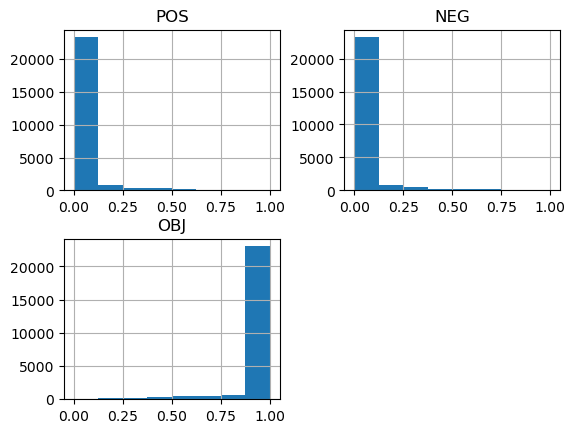

In [13]:
sent_an.hist(bins=8)

<Axes: >

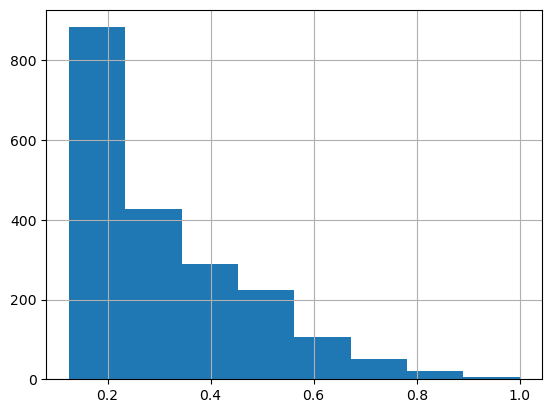

In [14]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<Axes: >

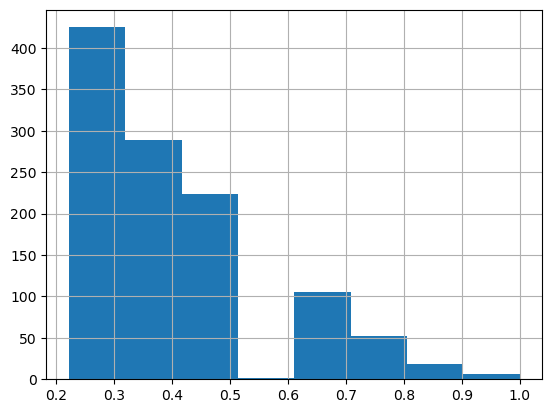

In [15]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<Axes: >

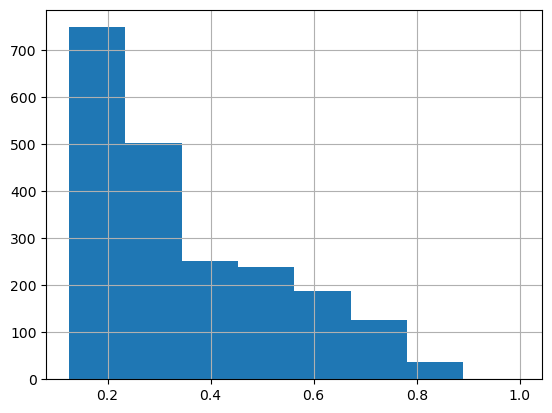

In [16]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<Axes: >

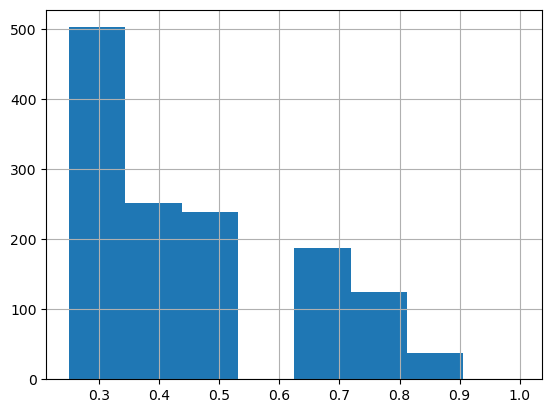

In [17]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [18]:
sent_an["Vrsta"].value_counts(sort=True)

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: ylabel='count'>

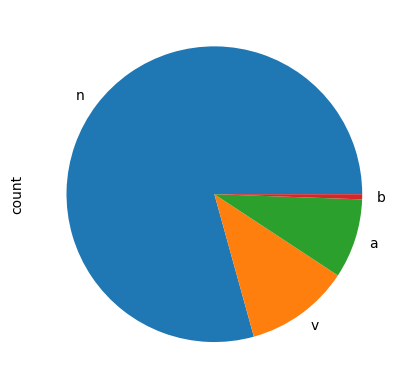

In [19]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

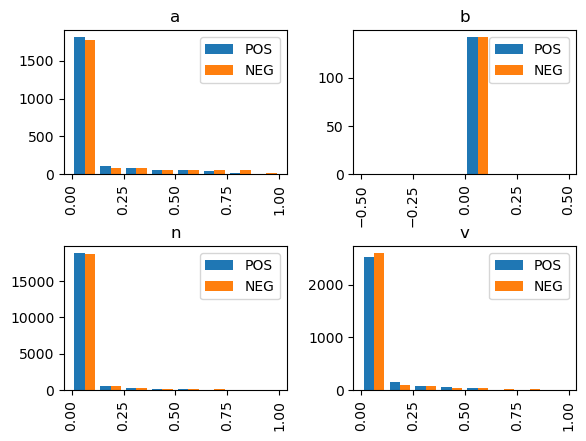

In [20]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'v'}>, <Axes: >]], dtype=object)

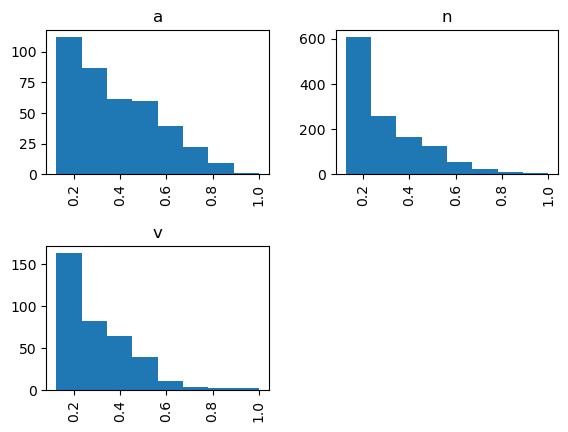

In [21]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'v'}>, <Axes: >]], dtype=object)

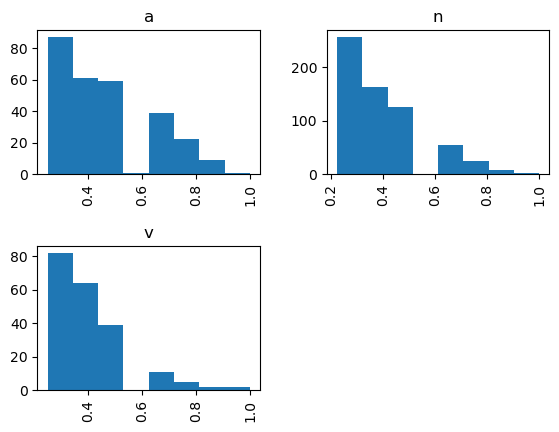

In [22]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'v'}>, <Axes: >]], dtype=object)

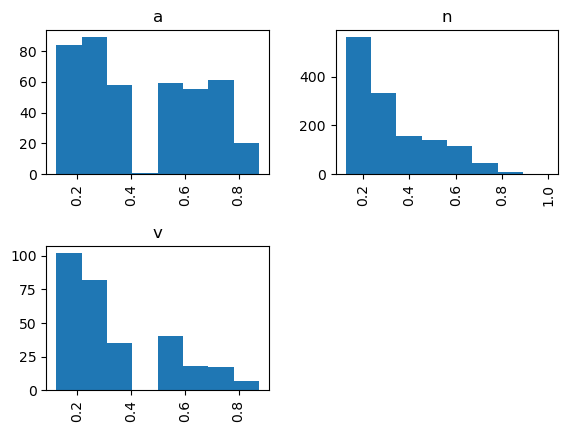

In [23]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'v'}>, <Axes: >]], dtype=object)

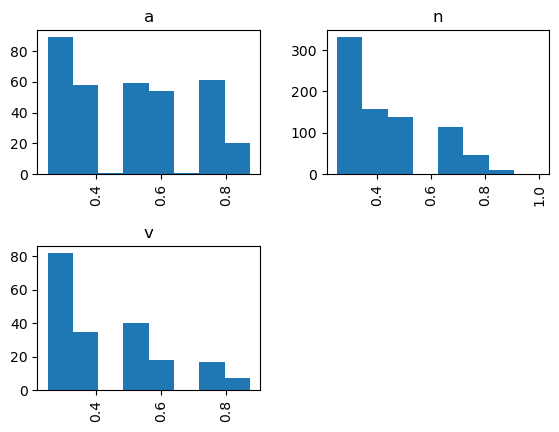

In [24]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

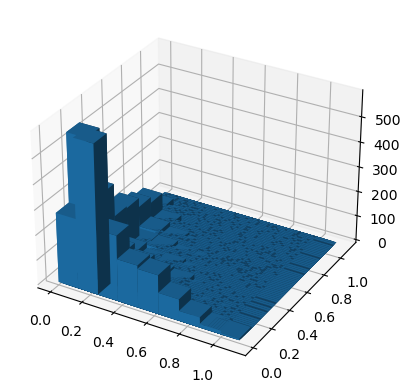

In [25]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<Axes: ylabel='count'>

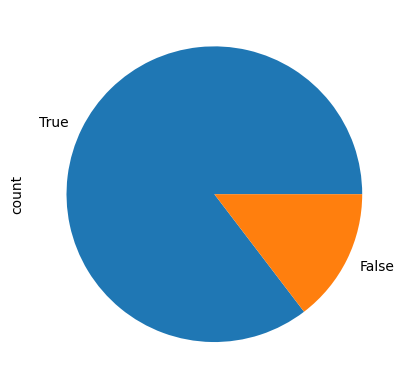

In [26]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

<Axes: xlabel='NEG'>

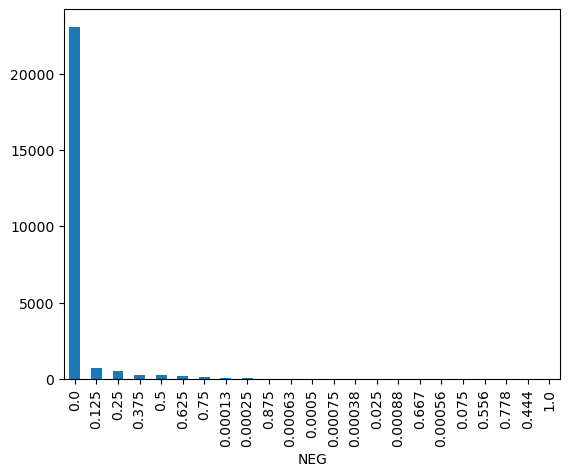

In [27]:
sent_an["NEG"].value_counts().plot(kind = "bar")

<Axes: xlabel='POS'>

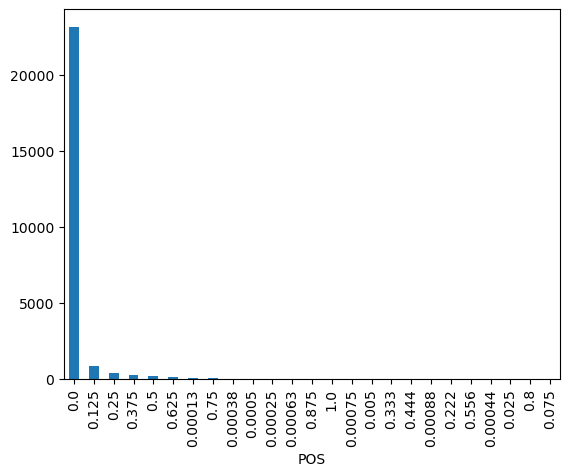

In [28]:
sent_an["POS"].value_counts().plot(kind = "bar")

In [29]:
a = sent_an[["POS","NEG"]].value_counts(sort=True)

<Axes: ylabel='count'>

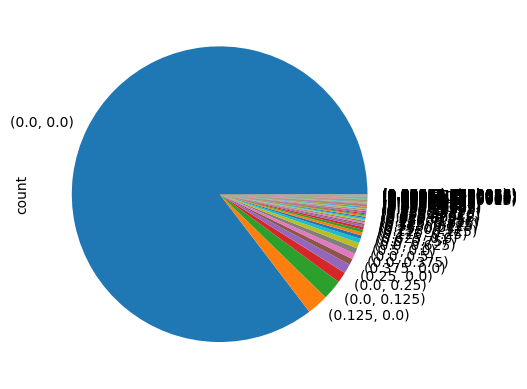

In [30]:
a.plot(kind ="pie")

In [31]:
sent_an["Vrsta"].value_counts()

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: title={'center': 'imenice-negativno'}, xlabel='NEG'>

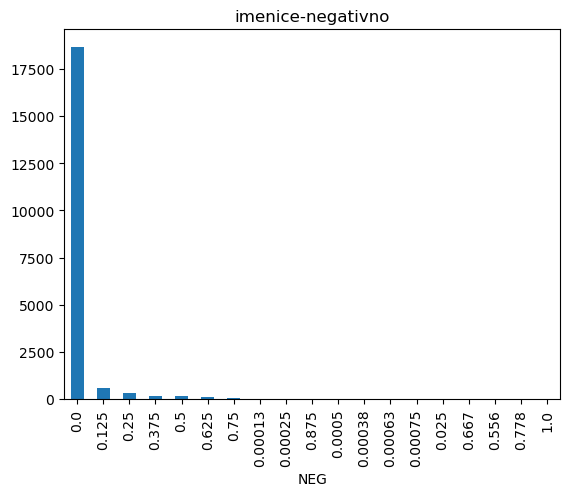

In [32]:
sent_an[sent_an["Vrsta"] == 'n']["NEG"].value_counts().plot(kind = "bar", title = "imenice-negativno")

<Axes: title={'center': 'imenica-positivno'}, xlabel='POS'>

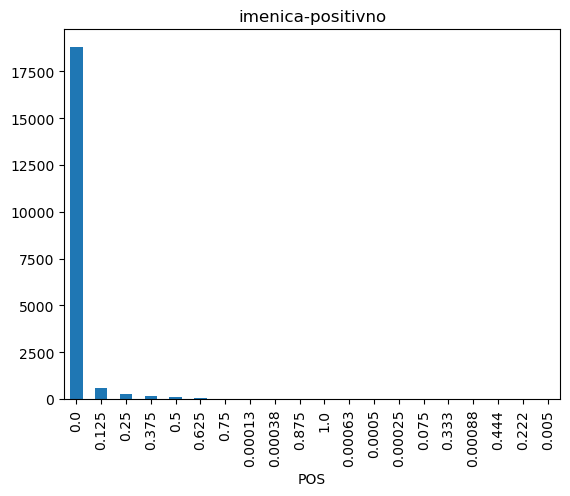

In [33]:
sent_an[sent_an["Vrsta"] == 'n']["POS"].value_counts().plot(kind = "bar", title = "imenica-positivno")

<Axes: title={'center': 'glagol-negativno'}, xlabel='NEG'>

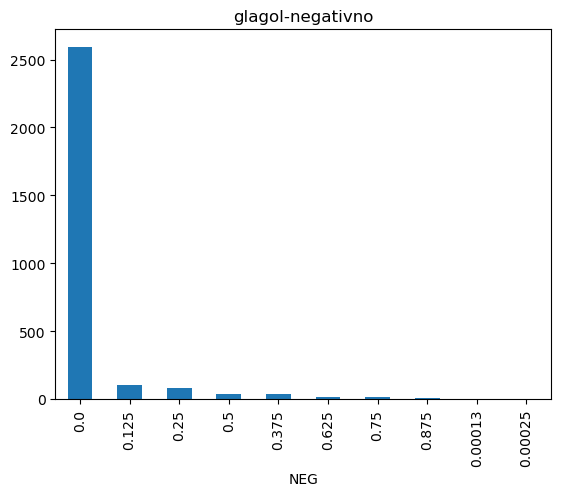

In [34]:
sent_an[sent_an["Vrsta"] == 'v']["NEG"].value_counts().plot(kind = "bar", title = "glagol-negativno")

<Axes: title={'center': 'glagol-positivno'}, xlabel='POS'>

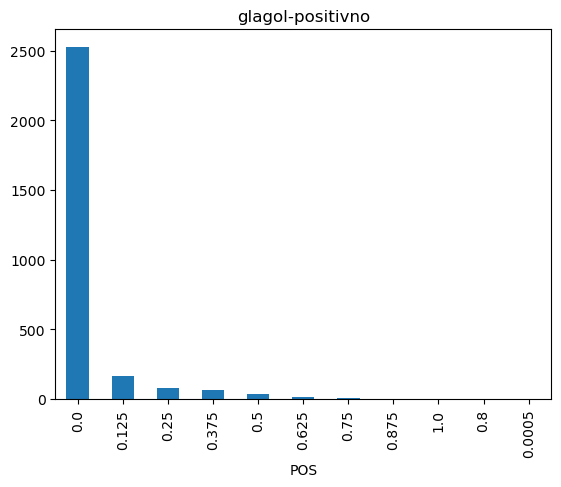

In [35]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "glagol-positivno")

<Axes: title={'center': 'pridev-negativno'}, xlabel='NEG'>

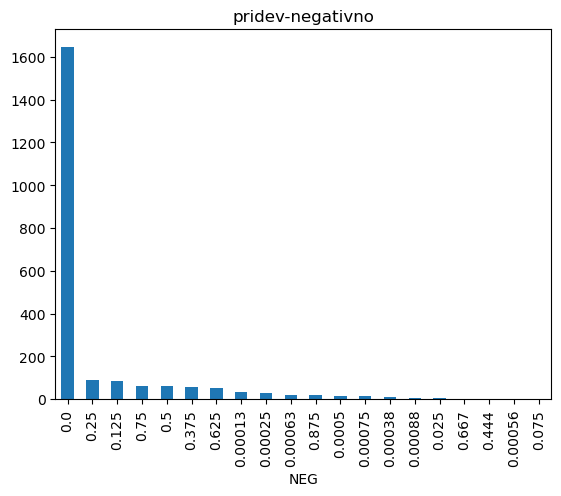

In [36]:
sent_an[sent_an["Vrsta"] == 'a']["NEG"].value_counts().plot(kind = "bar", title = "pridev-negativno")

<Axes: title={'center': 'pridev-positivno'}, xlabel='POS'>

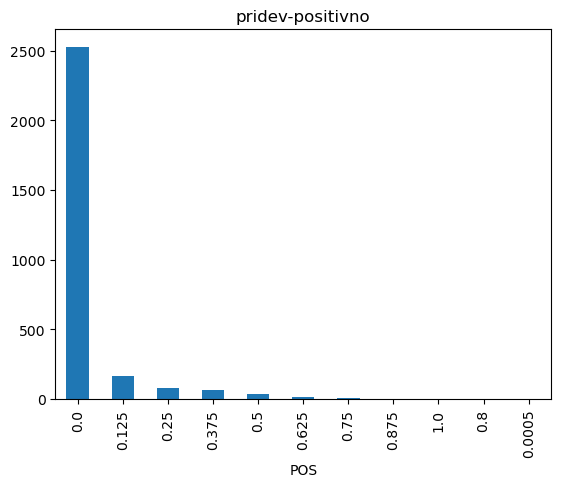

In [37]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "pridev-positivno")

KeyError: 0

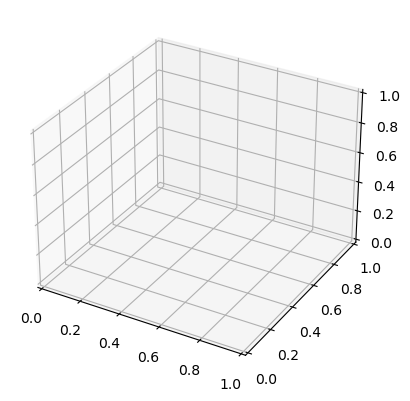

In [38]:

fig = plt.figure()
b =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')


In [ ]:
a = sent_an[["POS","NEG", "Vrsta"]].value_counts(sort=True)
a

In [ ]:
fig = plt.figure()
c =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')

b =c [c["Vrsta"]=="n"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')
b =c [c["Vrsta"]=="v"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='blue')
b =c [c["Vrsta"]=="a"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='red')



In [ ]:
# srbsentiwordnet2.csv
# srbsentiwordnet_a2.csv